<a href="https://colab.research.google.com/github/gmauricio-toledo/mandelbrot/blob/main/Mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El conjunto de Mandelbrot

In [28]:
L = np.array([complex(0,3),complex(-1,2),complex(0,0.5),complex(-0.5,1)])

np.any(np.abs(L)>2)

True

In [72]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

class Iteracion:

    def __init__(self,c,num_iteraciones,infinity_threshold=10):
        self.c = c
        self.escaped = False
        self.num_iteraciones = num_iteraciones
        self.iteraciones = range(self.num_iteraciones)
        self.orbita = [complex(0,0)]
        self.orbita_len = 1
        for i in self.iteraciones:
            next = self.__p(self.orbita[-1])
            norma = np.abs(next)
            if norma < infinity_threshold:
                self.orbita.append(next)
                self.orbita_len += 1
            else:
                self.escaped = True
                break
        self.orbita = np.array(self.orbita)
        # if np.any(np.abs(self.orbita)> 10):
        #     self.escaped = True
        # else:
        #     self.escaped = False

    def __p(self,z):
        return (z*z)+self.c

    def graficar(self,fname='orbita.gif'):
        def update(n):
            # ax.clear()
            ax.axhline(0,color='gray')
            ax.axvline(0,color='gray')
            x, y = self.orbita[n].real, self.orbita[n].imag
            fig.suptitle(f"c={self.c}, ¿se escapa? {self.escaped},\nIteración: {n}, z={complex(round(x,3),round(y,3))}")
            if np.abs(complex(x,y)) > 11:
                fig.suptitle("Se escapó")
            else:
                ax.scatter([x], [y], s=45, color='black')
        fig, ax = plt.subplots(figsize=(7,5))
        ax.set_xlim(-10,10)
        ax.set_ylim(-10,10)
        ax.set_xticks([-10,-5,0,5,10])
        ax.set_yticks([-10,-5,0,5,10])
        ani = animation.FuncAnimation(fig, update,
                                      frames=self.orbita_len,
                                      interval=1000)
        ani.save(fname, writer='pillow')
        plt.close(fig)

True


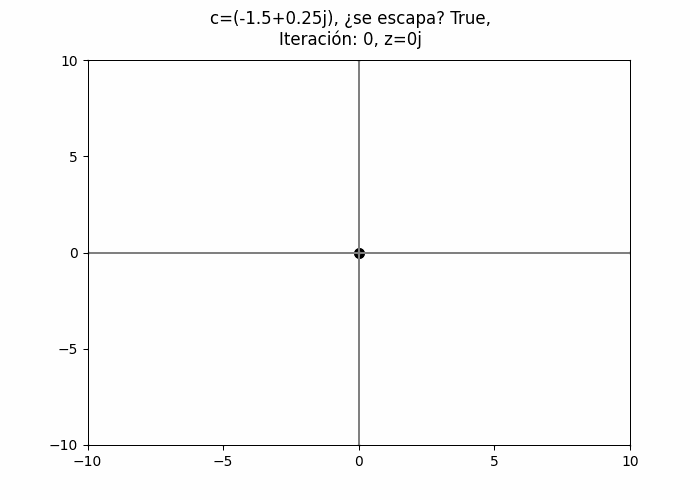

In [73]:
from IPython.display import Image

c = complex(-1.5,0.25)
num_iteraciones = 10

iteracion = Iteracion(c=c,
                    num_iteraciones=num_iteraciones)
print(iteracion.escaped)
# print(iteracion.orbita)
# print(np.abs(iteracion.orbita))
iteracion.graficar()
Image(open('orbita.gif','rb').read())

Recopilamos algunos puntos que están en el conjunto de Mandelbrot, usando la inspección anterior.

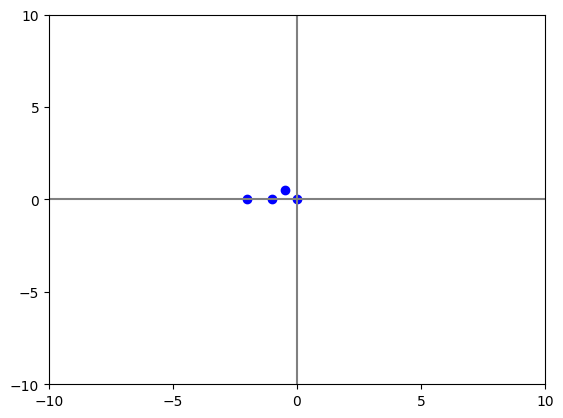

In [ ]:
cs = [0+0j,-1+0j,-2+0j,-0.5+0.5j]

plt.figure()
plt.scatter([c.real for c in cs],[c.imag for c in cs],color='blue')
plt.axhline(0,color='gray')
plt.axvline(0,color='gray')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xticks([-10,-5,0,5,10])
plt.yticks([-10,-5,0,5,10])
plt.show()

Brute force plotting

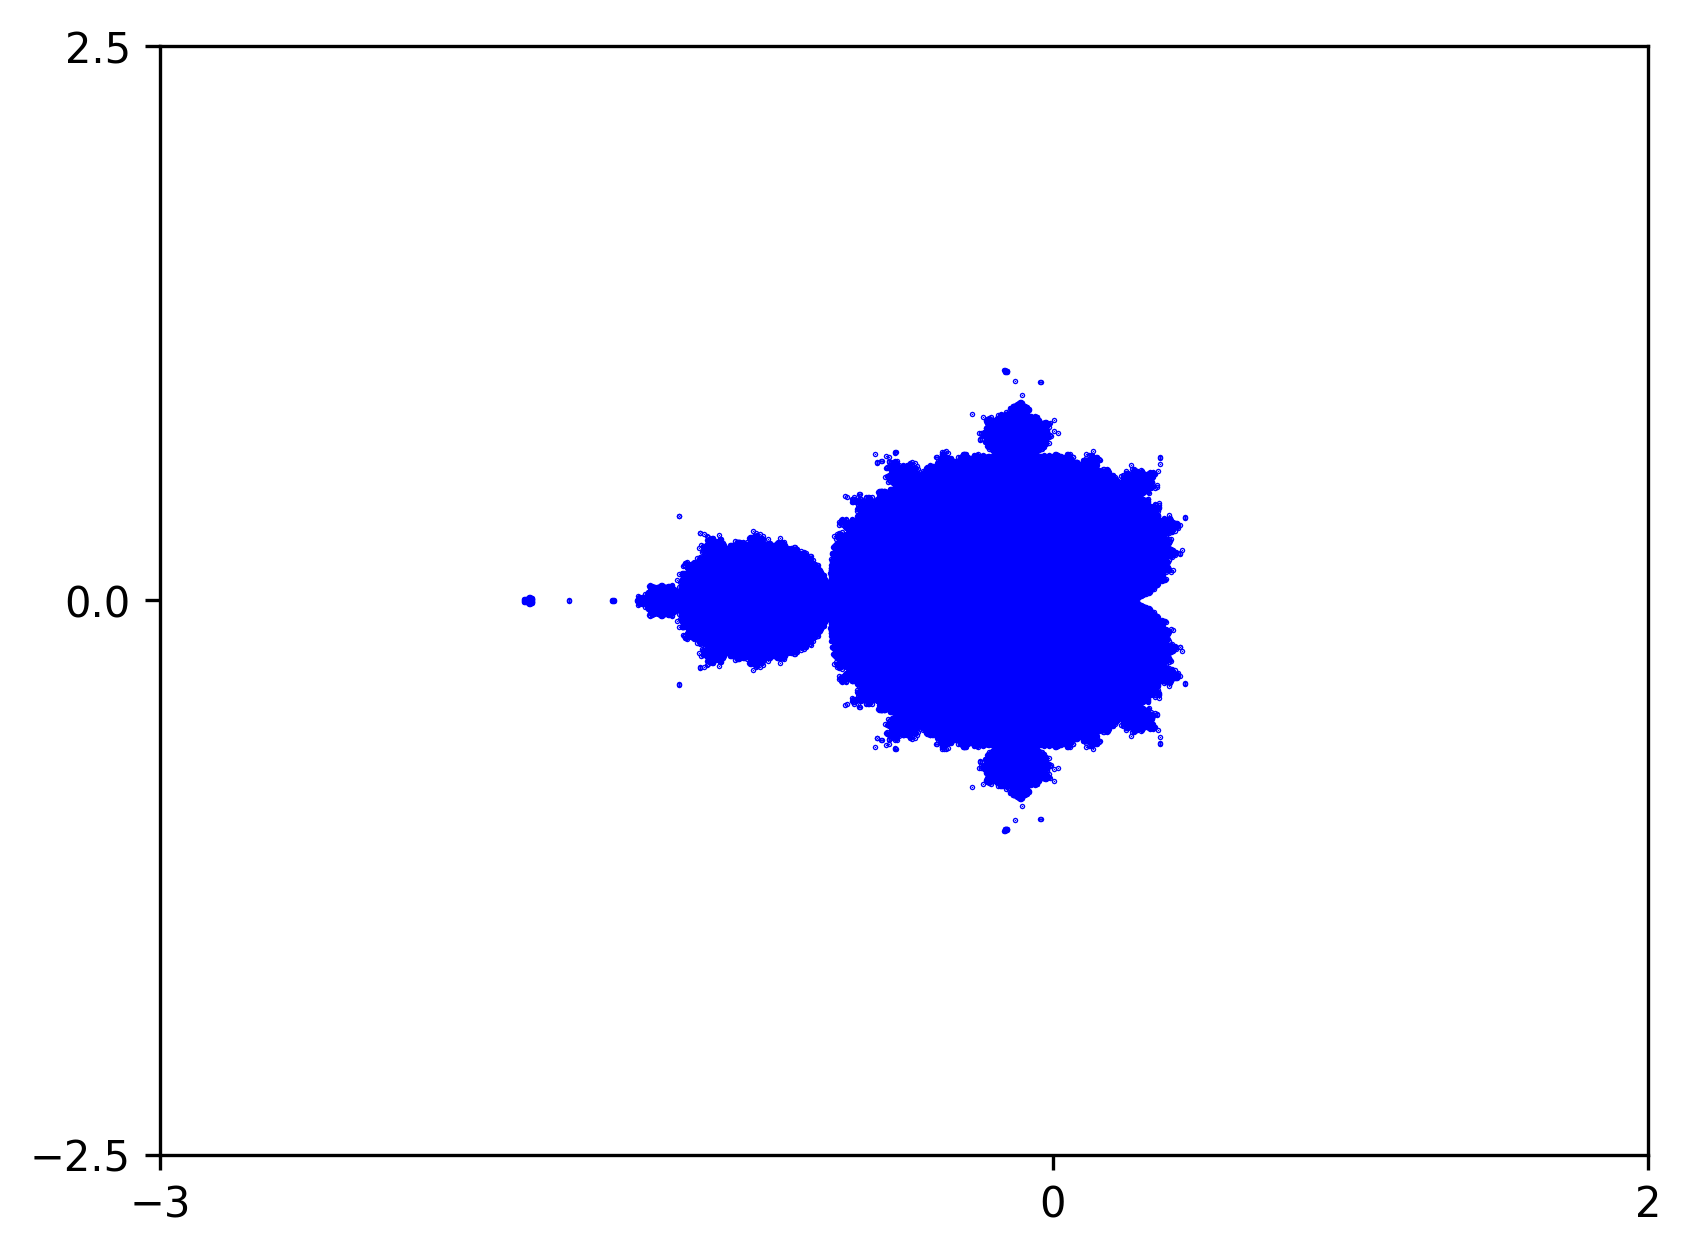

In [95]:
xmin = -3
xmax = 2
ymin = -2.5
ymax = 2.5
num_puntos = 1500

inf_threshold = 75

num_iteraciones = 75

mesh = np.meshgrid(np.linspace(xmin,xmax,num_puntos),
                   np.linspace(ymin,ymax,num_puntos))

points = []

for x,y in zip(mesh[0].flatten(),mesh[1].flatten()):
    c = complex(x,y)
    try:
        iteracion = Iteracion(c=c,num_iteraciones=num_iteraciones,
                              infinity_threshold=inf_threshold)
    except OverflowError:
        print(c)
    if not iteracion.escaped:
        points.append([x,y])
points = np.array(points)

fname = f'mandelbrot-res_{num_puntos}-umbral_{inf_threshold}-num_iter_{num_iteraciones}.npy'
np.save(fname,points)

plt.figure(dpi=300)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xticks([xmin,0,xmax])
plt.yticks([ymin,0,ymax])
plt.scatter(points[:,0],points[:,1],color='blue',s=0.1)
plt.show()

In [96]:
points.shape

(140364, 2)